<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 06**
# Training Deep Networks (Loss, Backpropagation & Optimization)
· Implement and visualize Activation Functions
(Sigmoid, ReLU, Tanh, Softmax, etc.) and Loss Functions (MSE, Cross-Entropy).  Generate plots to understand their behavior.

· Implement Backpropagation for training the network.

· Compare Optimizers (SGD, Momentum, Adam) on a small dataset to understand convergence speed and performance.

Date:02\09\2025____________________________________________________________________________________SAP: 500124406

# **Aim and Objective**

**Aim:** To analyze the components of training deep neural networks.

**Objective:**
* To implement and plot standard Activation Functions (Sigmoid, Tanh, ReLU).
* To understand Loss Functions (MSE vs. Cross-Entropy).
* To compare the convergence speed of different Optimizers (SGD, Momentum, Adam) on a synthetic dataset.

# **Theory**

**Activation Functions:** These introduce non-linearity, allowing the network to learn complex patterns.

*   **Sigmoid:** Squashes input to $(0, 1)$. Good for probabilities but causes vanishing gradients.
*   **ReLU (Rectified Linear Unit):** $max(0, x)$. Solves vanishing gradient, standard for hidden layers.
*   **Softmax:** Converts a vector of numbers into a probability distribution summing to 1.

**Loss Functions:** Measure how "wrong" the model is.

*   **MSE (Mean Squared Error):** Used for Regression.
*   **Cross-Entropy:** Used for Classification (punishes wrong confident predictions heavily).

**Optimizers:** Algorithms to update weights during Backpropagation.

*   **SGD:** Basic updates. Can get stuck in local minima.
*   **Momentum:** Accumulates velocity to smooth out updates.

# **Import Libraries and Visualize Activation Functions**

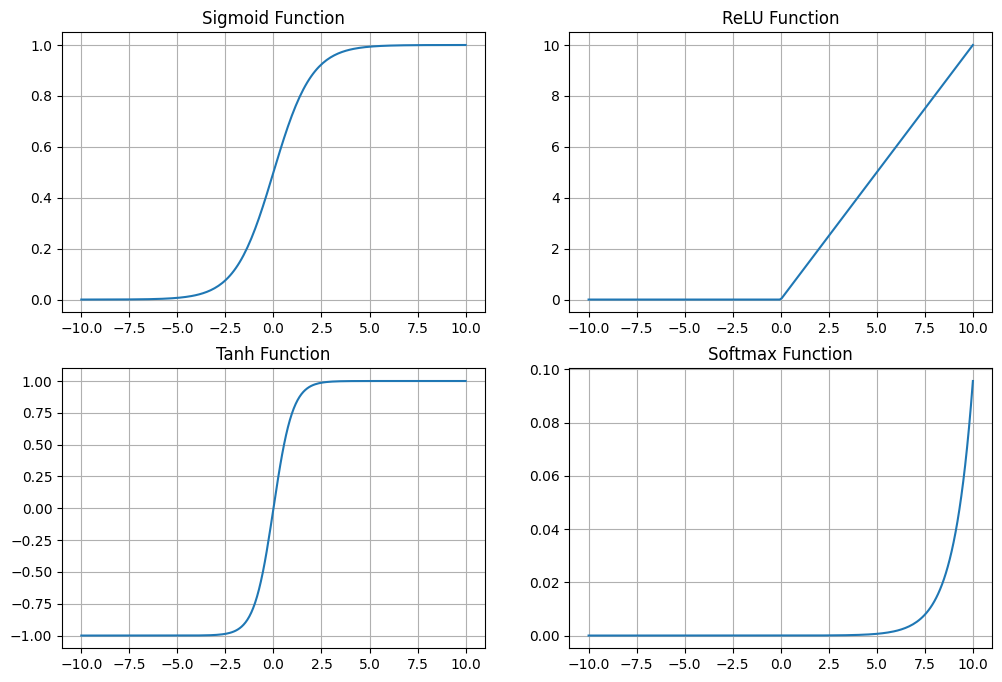

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Input range
x = np.linspace(-10, 10, 200)

# Plot activations
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.grid()

plt.subplot(2,2,2)
plt.plot(x, relu(x))
plt.title("ReLU Function")
plt.grid()

plt.subplot(2,2,3)
plt.plot(x, tanh(x))
plt.title("Tanh Function")
plt.grid()

plt.subplot(2,2,4)
plt.plot(x, softmax(x))  # softmax visualization is 1D (not common but for demo)
plt.title("Softmax Function")
plt.grid()

plt.show()


## **Visualize Loss Functions Behavior**
We simulate a scenario where the true label is 1 and see how the Loss changes as our prediction moves from 0 (wrong) to 1 (correct).

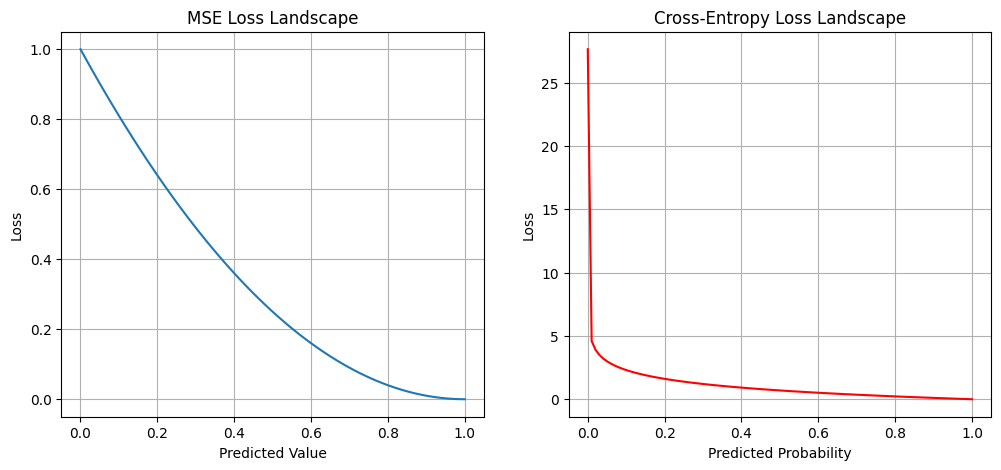

In [ ]:
# Loss Functions
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)
def cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Plot MSE vs Predictions
y_true = np.array([1])
y_preds = np.linspace(0, 1, 100)
mse_values = [mse(y_true, [y]) for y in y_preds]
ce_values = [cross_entropy(y_true, [y]) for y in y_preds]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(y_preds, mse_values, label="MSE Loss")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.title("MSE Loss Landscape")
plt.grid()

plt.subplot(1,2,2)
plt.plot(y_preds, ce_values, label="Cross-Entropy Loss", color='r')
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Landscape")
plt.grid()

plt.show()


# **Simple Neural Network with Backpropagation (1 hidden layer)**

In [ ]:

np.random.seed(42)

# Data (XOR example)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Initialize weights
W1 = np.random.randn(2,2)
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1)
b2 = np.zeros((1,1))

lr = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    # Loss (MSE)
    loss = mse(y, a2)

    # Backpropagation
    dz2 = a2 - y
    dW2 = a1.T.dot(dz2) / len(X)
    db2 = np.sum(dz2, axis=0, keepdims=True) / len(X)

    dz1 = dz2.dot(W2.T) * a1 * (1 - a1)
    dW1 = X.T.dot(dz1) / len(X)
    db1 = np.sum(dz1, axis=0, keepdims=True) / len(X)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
print("\nFinal Predictions:")
print(a2.round())


Epoch 0, Loss: 0.2558
Epoch 2000, Loss: 0.2454
Epoch 4000, Loss: 0.1466
Epoch 6000, Loss: 0.1309
Epoch 8000, Loss: 0.1283

Final Predictions:
[[0.]
 [0.]
 [1.]
 [1.]]


# **Compare Optimizers (SGD vs Momentum vs Adam)**
We generate a difficult synthetic dataset (make_circles) and train three identical models to see which one learns the fastest.

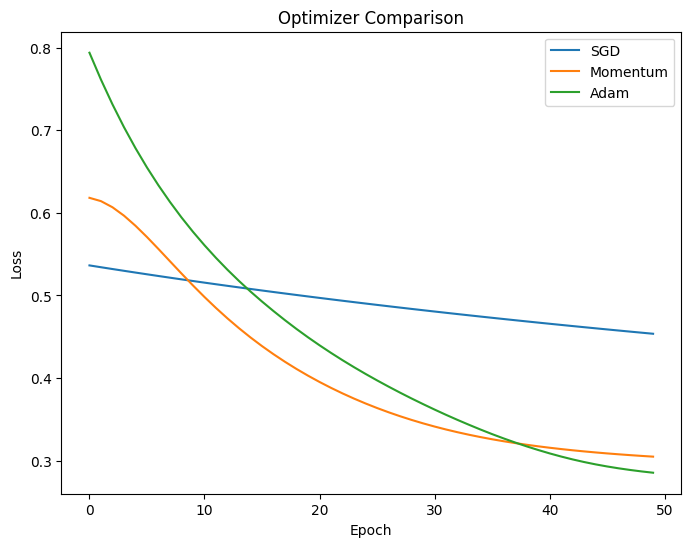

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)

# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Compare Optimizers
optimizers = {
    "SGD": optim.SGD,
    "Momentum": lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9),
    "Adam": optim.Adam
}

loss_fn = nn.CrossEntropyLoss()
results = {}

for name, opt_fn in optimizers.items():
    model = Net()
    optimizer = opt_fn(model.parameters(), lr=0.01)
    losses = []
    for epoch in range(50):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = loss_fn(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    results[name] = losses

# Plot Loss Comparison
plt.figure(figsize=(8,6))
for name, losses in results.items():
    plt.plot(losses, label=name)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimizer Comparison")
plt.legend()
plt.show()

## Observations and Conclusion



*  **Activations:** We visualized that Sigmoid saturates at 0 and 1 (causing vanishing gradients), while ReLU is linear for positive values, making it efficient for deep networks.

*   **Loss Functions:** The plot showed that Cross-Entropy rises steeply when the prediction is wrong, providing stronger gradients for classification than MSE.

*   **Optimizers:** In the final plot, Adam typically converges the fastest (lowest loss in fewest epochs), followed by SGD with Momentum. Standard SGD is usually the slowest and may fluctuate.






